In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer
from nltk.stem.porter import PorterStemmer
dataset=pd.read_csv(r'C:\Users\HP\Desktop\ML\Reviews.csv')
dataset=dataset.drop_duplicates(subset={'UserId','Time'},keep='first',inplace=False)
dataset=dataset.sample(30000)
dataset.reset_index(inplace = True) 
dataset=dataset.sort_values('Time',ascending=True)
print(len(dataset))

30000


In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
import nltk

stop=dict.fromkeys(stopwords.words('english'))
sno=SnowballStemmer('english')

def clean_html(sentence):
    x=re.compile('<.*?>')
    cleantext=re.sub(x,' ',sentence)
    return cleantext

def clean_punc(sentence):
    cleaned=re.sub(r'[?|!|\'|"|#|.|,|)|(|\|/]',r' ',sentence)
    return cleaned

p_text=[] #processed text
from tqdm import tqdm
for sent in tqdm(dataset['Text'].values,position=0,leave=True):
    sent=clean_html(sent)
    sent=clean_punc(sent)
    s=[]
    for w in sent.split():
        if(w.isalpha() and len(w)>2 and w.lower() not in stop):
            w=(sno.stem(w.lower()))
            s.append(w)
    sent=" ".join(s)
    p_text.append(sent)

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:44<00:00, 676.87it/s]


In [3]:
Y=[]
p_reviews=0
n_reviews=0
for score in dataset['Score'].values:
    if score >=4:
        Y.append(1)
        p_reviews+=1
    else:
        Y.append(0)
        n_reviews+=1
        
dataset['class']=Y
print(len(Y))
print(p_reviews)

30000
23364


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
#X = vectorizer.fit_transform(p_text)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.naive_bayes import BernoulliNB

x_train,x_test,y_train,y_test=train_test_split(p_text,Y,test_size=0.3,random_state=30)
x_train=vectorizer.fit_transform(x_train)
acc=[]
alpha=[]
for a in tqdm(range(0,40),position=0,leave=True):
    model=BernoulliNB(alpha=a)
    scores=cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
    acc.append(scores.mean())
    alpha.append(a)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:48<00:00,  1.13s/it]


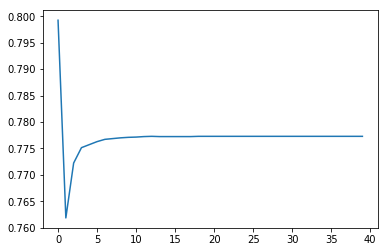

In [53]:
plt.plot(alpha,acc)

In [54]:
clf=BernoulliNB(alpha=0.0000000001,binarize=0.0)
clf.fit(x_train,y_train)

BernoulliNB(alpha=1e-10, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
x_test=vectorizer.transform(x_test)
pred=clf.predict(x_test)
test_a=accuracy_score(y_test,pred)*100
test_p=precision_score(y_test,pred)
test_r=recall_score(y_test,pred)
test_f=f1_score(y_test,pred)
test_c=confusion_matrix(y_test,pred)
print("Accuracy: ",test_a)
print("Precision: ",test_p)
print("Recall: ",test_r)
print("F1 score: ",test_f)
print("Confusion Matrix: ",test_c)

Accuracy:  80.31111111111112
Precision:  0.8074454428754814
Recall:  0.9826729157790086
F1 score:  0.8864830237027547
Confusion Matrix:  [[ 309 1650]
 [ 122 6919]]


In [48]:
s=input("Enter review: ")
s=clean_html(s)
s=clean_punc(s)
bow=[]
for w in s.split():
    if(w.isalpha() and len(w)>2 and w.lower() not in stop):
        w=(sno.stem(w.lower()))
        bow.append(w)
s=" ".join(bow)

vec=vectorizer.transform([s])
result=clf.predict(vec.toarray())[0]
if result==1:
    print("Positive review")
else:
    print("Negative review")



Enter review: good
Positive review
